## top quark의 delta r 

In [3]:
import pylhe
import numpy as np

def eta(px, py, pz):
    p = np.sqrt(px**2 + py**2 + pz**2)
    return 0.5 * np.log((p + pz) / (p - pz))

def phi(px, py):
    return np.arctan2(py, px)

def delta_r(p1, p2):
    """p1, p2 모두 dict 형태로 {'eta':…, 'phi':…}"""
    dphi = np.abs(p1['phi'] - p2['phi'])
    if dphi > np.pi:
        dphi = 2*np.pi - dphi
    deta = p1['eta'] - p2['eta']
    return np.sqrt(deta**2 + dphi**2)

lhe_file = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/condorfiles/LO_top_wr_only_decay/result_WR6500_N600/cmsgrid_final.lhe"

# 결과 저장용
dr_ud = []          # u–d (or s–c) 사이 ΔR
dr_b_light = []     # b–(u or d), b–(d or u) ΔR 쌍

for event in pylhe.read_lhe_with_attributes(lhe_file):
    parts = event.particles

    # mother index 조건: mother1 또는 mother2 가 5 또는 6
    def has_valid_mother(p):
        return (p.mother1 in (5,6)) or (p.mother2 in (5,6))

    # quark 후보만 필터링
    quarks = [p for p in parts 
              if has_valid_mother(p) and abs(p.id) in (1,2,3,4,5)]
    # PDG ID 세트 추출
    pid_set = set(abs(p.id) for p in quarks)

    # (u,d,b) 또는 (s,c,b) 만 선택
    if pid_set == {1,2,5} or pid_set == {3,4,5}:
        # 바텀 쿼크 분리
        bq = next(p for p in quarks if abs(p.id) == 5)
        lights = [p for p in quarks if abs(p.id) != 5]

        # η,φ 계산
        vecs = {}
        for p in [bq] + lights:
            vecs[p] = {
                'eta': eta(p.px, p.py, p.pz),
                'phi': phi(p.px, p.py)
            }

        # 라이트-라이트 ΔR
        dr_ud.append(delta_r(vecs[lights[0]], vecs[lights[1]]))

        # 바텀-라이트 ΔR (두 쌍)
        dr_b_light.append((
            delta_r(vecs[bq], vecs[lights[0]]),
            delta_r(vecs[bq], vecs[lights[1]])
        ))

# 결과 예시 출력
print(f"Light–light ΔR (총 {len(dr_ud)}개):", dr_ud[:10])
print(f"b–light ΔR 쌍 (총 {len(dr_b_light)}개):", dr_b_light[:10])


Light–light ΔR (총 9664개): [np.float64(0.16567046528289683), np.float64(0.7249677359143117), np.float64(0.30486775806507393), np.float64(0.9466082699246822), np.float64(0.24404907257479658), np.float64(0.3489532620752463), np.float64(0.16519319233852955), np.float64(0.13173785210510428), np.float64(0.15243701452926672), np.float64(0.561714253987085)]
b–light ΔR 쌍 (총 9664개): [(np.float64(0.15114718560446952), np.float64(0.2831558997954436)), (np.float64(0.7650439701428595), np.float64(0.1775029055583731)), (np.float64(3.395681212667811), np.float64(3.208481607418774)), (np.float64(0.5295524876158022), np.float64(0.4654761159694219)), (np.float64(0.2913745863462793), np.float64(0.1696143487189289)), (np.float64(2.601227042061088), np.float64(2.666427968861861)), (np.float64(0.14291666390146232), np.float64(0.258735855680235)), (np.float64(0.2631067047302965), np.float64(0.1738866127569108)), (np.float64(0.2288138252933867), np.float64(0.37999732032802747)), (np.float64(0.3582816048236779)

"/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/condorfiles/LO_top_wr_only_decay/result_WR6500_N6300/cmsgrid_final.lhe"

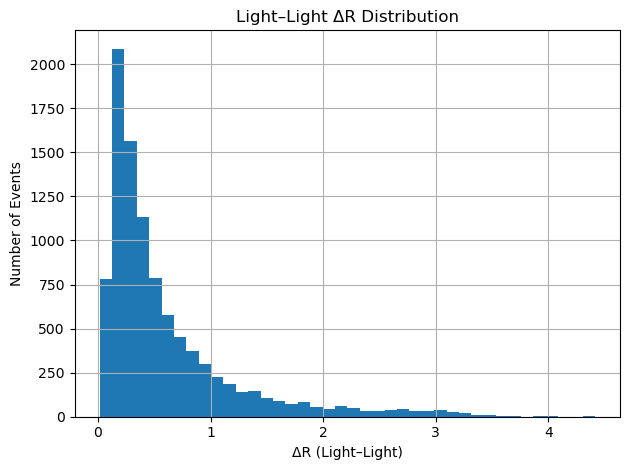

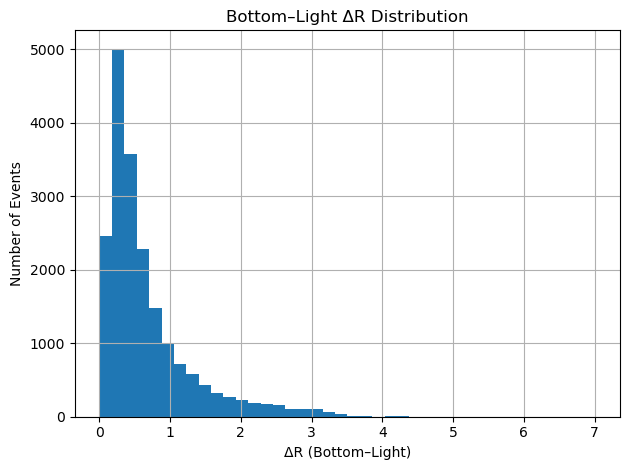

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# (이전에 계산된) ΔR 값 리스트
# dr_ud: list of float, light–light ΔR
# dr_b_light: list of tuple(float, float), bottom–light ΔR pairs

# 바텀–라이트 ΔR 쌍을 평탄화
dr_b_flat = [d for pair in dr_b_light for d in pair]

# 히스토그램 1: 라이트–라이트 ΔR
plt.figure()
plt.hist(dr_ud, bins=40)
plt.xlabel("ΔR (Light–Light)")
plt.ylabel("Number of Events")
plt.title("Light–Light ΔR Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

# 히스토그램 2: 바텀–라이트 ΔR
plt.figure()
plt.hist(dr_b_flat, bins=40)
plt.xlabel("ΔR (Bottom–Light)")
plt.ylabel("Number of Events")
plt.title("Bottom–Light ΔR Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()
